<a href="https://colab.research.google.com/github/deadshotbane80/Bigram_Trigram/blob/main/Trigram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [1]:
words = open('names.txt','r').read().splitlines()

In [2]:
chars = sorted(list(set(''.join(words))))

In [3]:
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [79]:
#Creating the dataset
X,Y = [],[]
for word in words:
  nword = ['.'] + list(word) + ['.']
  for ch1,ch2,ch3 in zip(nword,nword[1:],nword[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    # print(ch1,ch2,ch3)
    X.append([ix1,ix2])
    Y.append(ix3)
X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
print(X)
print(Y)

tensor([[ 0,  5],
        [ 5, 13],
        [13, 13],
        [13,  1]])
tensor([13, 13,  1,  0])


In [80]:
xenc = F.one_hot(X,num_classes = 27).float()
xenc.shape

torch.Size([196113, 2, 27])

In [86]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((54,27),generator = g,requires_grad = True)

In [87]:
li = []
p = []

In [90]:

for i in range(100):
  #forward pass
  logits = xenc.view(-1,54) @ W
  counts = logits.exp()
  probs = counts/counts.sum(1,keepdim = True)
  loss = -probs[torch.arange(len(X)),Y].log().mean()

  #backward pass
  W.grad = None
  loss.backward()
  li.append(loss.item())
  p.append(i)
  #update
  W.data += -50*W.grad
print(loss.item())

2.2414815425872803


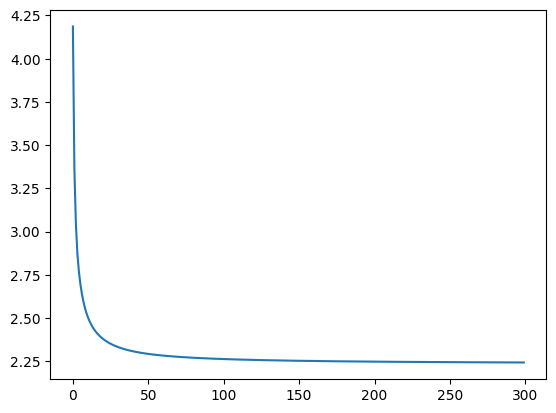

In [89]:
plt.plot(p,li)

In [91]:
for i in range(20):
  name = []
  ix = 0
  while True:
    xenc = F.one_hot(torch.tensor([ix]),num_classes = 54).float()
    logits = xenc.view(1,54) @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim = True)
    ix = torch.multinomial(probs,num_samples = 1,replacement = True,generator = g).item()
    name.append(itos[ix])
    if ix == 0:
      break
  print(''.join(name))

owo.
adi.
ies.
lhyiaitmin.
afzyinlcirzan.
hpi.
o.
halar.
m.
zvki.
khtaezezielo.
eryekecdnu.
budhisiagaa.
n.
dfinabtmuthaaihwvyu.
coadvelesfrui.
yltelyha.
aftfr.
youpe.
eeppuocevrali.
